###  Imports

In [1]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

### Get data from Reddit

In [3]:
allPosts = pd.read_csv('./../Data/all_posts.csv')
allPosts.head()

,Author,Subreddit,Date,Title,Post
0,username123456111111,depression,1.620596e+09,i just want to time travel back and fix my mis...,(english is my second language so sorry if i m...
1,iSlurpees,depression,1.620602e+09,Is this depression,"I felt on top of the world Friday night, every..."
2,Awkward-Cat98,depression,1.620643e+09,White hair due to stress and depression,"Hi everyone, \nI really want to hear if anyone..."
3,kitkatpaddywat,depression,1.620593e+09,Everything is “getting back to normal”,And it’s making me super depressed. I have not...
4,sugarpopp,depression,1.620508e+09,Am I happy or am I delusional in my bubble?,"I am 25F, gonna turn 26 on 15th May. have been..."


In [4]:
allPosts.loc[1]['Post']

'I felt on top of the world Friday night, everything was going for me.\nNow I just feel so low and like I’m putting on an act whenever I’m with people.\nI let myself get walked all over and don’t care.\nI keep asking myself who would care if I didn’t come home.\nI drink and don’t stop because it makes me the life of the party for a few hours.\nMakes me not feel small for a while. \nBut then I go back to being alone and the thoughts start coming back.'

### Clean data

In [5]:
print(len(allPosts))

3938


In [6]:
allPosts = allPosts[allPosts['Post'].notna()]
print(len(allPosts))

3809


In [7]:
allPosts['Post'] = allPosts['Post'].astype(str)
print(len(allPosts))

3809


In [8]:
urls = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
numbers = '\d+(\.\d+)?'
posessivePronouns = '’s'
apostrophe='’'
someSigns ='\\n|\\r'
punctuation = "[^\w\s]" 
whitespaces = '\s+'
leadTrailWhitespace = '^\s+|\s+?$'

allPosts['Post_Parsed'] = allPosts['Post'].str.lower()
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(urls,'url',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(numbers,'nmbr',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(posessivePronouns,'',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(apostrophe,'',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(someSigns,'',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(punctuation,' ',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(whitespaces,' ',regex=True)
allPosts['Post_Parsed'] = allPosts['Post_Parsed'].str.replace(leadTrailWhitespace,'',regex=True)

allPosts.loc[1]['Post_Parsed']

'i felt on top of the world friday night everything was going for me now i just feel so low and like im putting on an act whenever im with people i let myself get walked all over and dont care i keep asking myself who would care if i didnt come home i drink and dont stop because it makes me the life of the party for a few hours makes me not feel small for a while but then i go back to being alone and the thoughts start coming back'

In [9]:
allPosts.head()

,Author,Subreddit,Date,Title,Post,Post_Parsed
0,username123456111111,depression,1.620596e+09,i just want to time travel back and fix my mis...,(english is my second language so sorry if i m...,english is my second language so sorry if i ma...
1,iSlurpees,depression,1.620602e+09,Is this depression,"I felt on top of the world Friday night, every...",i felt on top of the world friday night everyt...
2,Awkward-Cat98,depression,1.620643e+09,White hair due to stress and depression,"Hi everyone, \nI really want to hear if anyone...",hi everyone i really want to hear if anyone ha...
3,kitkatpaddywat,depression,1.620593e+09,Everything is “getting back to normal”,And it’s making me super depressed. I have not...,and it making me super depressed i have nothin...
4,sugarpopp,depression,1.620508e+09,Am I happy or am I delusional in my bubble?,"I am 25F, gonna turn 26 on 15th May. have been...",i am nmbrf gonna turn nmbr on nmbrth may have ...


In [10]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# stop words
with open('./../stop_words_no_punct.data', 'rb') as filehandle:
    # read the data as binary data stream
    stop_words_no_punct = pickle.load(filehandle)

In [13]:
from nltk.tokenize import word_tokenize
post_without_stop_words = []

for post in allPosts.Post_Parsed:
    text_tokens = word_tokenize(post)
    tokens_without_stop_words = [word for word in text_tokens if not word in stop_words_no_punct]
    post_without_stop_words.append((" ").join(tokens_without_stop_words))

allPosts['Post_Parsed'] = post_without_stop_words

In [14]:
allPosts.loc[1]['Post_Parsed']

'felt top world friday night everything going feel low like im putting act whenever im people let get walked care keep asking would care come home drink stop makes life party hours makes feel small go back alone thoughts start coming back'

### Label Encoding

In [15]:
category_codes = {
    'depression': 0,
    'unpopularopinion': 1,
    'lonely': 2,
    'MachineLearning': 3
}

In [16]:
# Category mapping
allPosts['Subreddit_Code'] = allPosts['Subreddit']
allPosts = allPosts.replace({'Subreddit_Code':category_codes})

allPosts.head()

,Author,Subreddit,Date,Title,Post,Post_Parsed,Subreddit_Code
0,username123456111111,depression,1.620596e+09,i just want to time travel back and fix my mis...,(english is my second language so sorry if i m...,english second language sorry made mistake wat...,0
1,iSlurpees,depression,1.620602e+09,Is this depression,"I felt on top of the world Friday night, every...",felt top world friday night everything going f...,0
2,Awkward-Cat98,depression,1.620643e+09,White hair due to stress and depression,"Hi everyone, \nI really want to hear if anyone...",hi everyone really want hear anyone experience...,0
3,kitkatpaddywat,depression,1.620593e+09,Everything is “getting back to normal”,And it’s making me super depressed. I have not...,making super depressed nothing go back job gon...,0
4,sugarpopp,depression,1.620508e+09,Am I happy or am I delusional in my bubble?,"I am 25F, gonna turn 26 on 15th May. have been...",nmbrf gon na turn nmbr nmbrth may suffering se...,0


In [17]:
allPosts.to_csv('all_posts_processed.csv', index=False)

### Generating Features

In [18]:
from nltk.tokenize import word_tokenize

def getWordFrequency(processedPostOutputFile):
    posts = pd.read_csv(processedPostOutputFile)

    allPostsConcat = ''
    for post in posts.Post_Parsed:
        if(type(post)==str):
            allPostsConcat+=post

    # create bag-of-words
    all_words = []

    words = word_tokenize(allPostsConcat)
    for word in words:
        all_words.append(word)

    all_words = nltk.FreqDist(all_words)
    
    return all_words

In [19]:
freqWords = getWordFrequency('all_posts_processed.csv')

# print the total number of words and the 100 most common words
print('Number of words: {}'.format(len(freqWords)))
print('Most common words: {}'.format(freqWords.most_common(100)))

word_features = list(freqWords.keys())[:1500]

# save word_features to file
filename = './word_features.data'
pickle.dump(word_features, open(filename, 'wb'))

Number of words: 24815
Most common words: [('nmbr', 4743), ('like', 3458), ('people', 2288), ('feel', 2090), ('im', 1820), ('know', 1692), ('get', 1688), ('want', 1671), ('even', 1639), ('one', 1619), ('time', 1560), ('url', 1492), ('would', 1491), ('life', 1486), ('really', 1297), ('think', 1179), ('friends', 1134), ('much', 993), ('make', 992), ('someone', 961), ('never', 955), ('good', 881), ('things', 871), ('go', 852), ('way', 849), ('day', 832), ('also', 827), ('something', 804), ('years', 765), ('could', 750), ('still', 737), ('always', 727), ('see', 724), ('work', 719), ('going', 718), ('better', 684), ('anyone', 664), ('talk', 658), ('need', 655), ('got', 641), ('anything', 617), ('person', 616), ('many', 610), ('back', 606), ('help', 605), ('say', 588), ('data', 588), ('bad', 583), ('ive', 582), ('model', 575), ('learning', 568), ('love', 562), ('every', 554), ('since', 548), ('find', 547), ('lot', 546), ('well', 545), ('everything', 531), ('everyone', 531), ('alone', 521), (

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


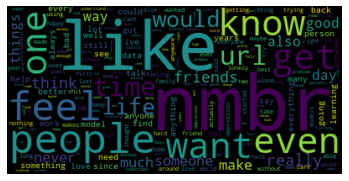

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
nltk.download('webtext')
data_analysis = freqWords
 
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 2])
 
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

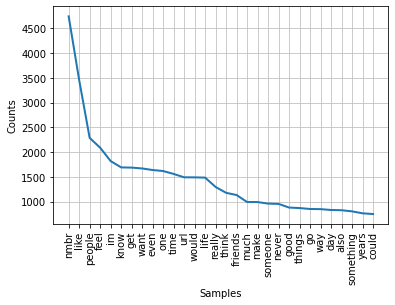

In [21]:
import matplotlib.pyplot as plt
freqWords.plot(30,cumulative=False)
plt.show()

### Train

In [22]:
# function to find features in every post
def find_features(post):
    words = word_tokenize(post)
    features = {}
    for word in word_features:
        features[word] = (word in words)
    return features

In [23]:
posts_all = list(zip(allPosts.loc[:,"Post_Parsed"].values,allPosts.loc[:,"Subreddit_Code"].values))

featuresets = [(find_features(text), label) for (text, label) in posts_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(allPosts))
print(len(training))
print(len(testing))

# save testing and training data to file
filename = './Models/testing_subreddits.data'
pickle.dump(testing, open(filename, 'wb'))

filename = './Models/training_subreddits.data'
pickle.dump(training, open(filename, 'wb'))

3809
2856
953


### Subreddits Classifier

In [24]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 36.09653725078699
Decision Tree Accuracy: 60.125918153200416
Random Forest Accuracy: 74.81636935991605
Logistic Regression Accuracy: 75.34102833158447
SGD Classifier Accuracy: 73.2423924449108
Naive Bayes Accuracy: 81.53200419727177
SVM Linear Accuracy: 71.66841552990556


In [25]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 71.66841552990556


In [26]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual','actual', 'actual'], ['depression', 'unpopularopinion', 'lonely', 'MachineLearning']],
    columns = [['predicted', 'predicted','predicted', 'predicted'], ['depression', 'unpopularopinion', 'lonely', 'MachineLearning']])

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       253
           1       0.82      0.77      0.79       252
           2       0.66      0.75      0.70       229
           3       0.94      0.87      0.91       219

    accuracy                           0.77       953
   macro avg       0.78      0.77      0.78       953
weighted avg       0.78      0.77      0.77       953



predicted                                        
                        depression unpopularopinion lonely MachineLearning
actual depression              178               21     52               2
       unpopularopinion         26              194     23               9
       lonely                   46               11    171               1
       MachineLearning           3               11     14             191

In [27]:
# save the model to disk
filename = './Models/finalized_model_subreddits.sav'
pickle.dump(nltk_ensemble, open(filename, 'wb'))

### r/depression Classifier

In [28]:
category_codes = {
    'depression': 0,
    'unpopularopinion': 1,
    'lonely': 1,
    'MachineLearning': 1
}

# Category mapping
allPosts['Is_Depression_Code'] = allPosts['Subreddit']
allPosts = allPosts.replace({'Is_Depression_Code':category_codes})

allPosts.head()

,Author,Subreddit,Date,Title,Post,Post_Parsed,Subreddit_Code,Is_Depression_Code
0,username123456111111,depression,1.620596e+09,i just want to time travel back and fix my mis...,(english is my second language so sorry if i m...,english second language sorry made mistake wat...,0,0
1,iSlurpees,depression,1.620602e+09,Is this depression,"I felt on top of the world Friday night, every...",felt top world friday night everything going f...,0,0
2,Awkward-Cat98,depression,1.620643e+09,White hair due to stress and depression,"Hi everyone, \nI really want to hear if anyone...",hi everyone really want hear anyone experience...,0,0
3,kitkatpaddywat,depression,1.620593e+09,Everything is “getting back to normal”,And it’s making me super depressed. I have not...,making super depressed nothing go back job gon...,0,0
4,sugarpopp,depression,1.620508e+09,Am I happy or am I delusional in my bubble?,"I am 25F, gonna turn 26 on 15th May. have been...",nmbrf gon na turn nmbr nmbrth may suffering se...,0,0


In [29]:
allPosts.to_csv('all_posts_processed.csv', index=False)

In [30]:
posts_all = list(zip(allPosts.loc[:,"Post_Parsed"].values,allPosts.loc[:,"Is_Depression_Code"].values))

featuresets = [(find_features(text), label) for (text, label) in posts_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(allPosts))
print(len(training))
print(len(testing))

# save testing and training data to file
filename = './Models/testing_depression.data'
pickle.dump(testing, open(filename, 'wb'))

filename = './Models/training_depression.data'
pickle.dump(training, open(filename, 'wb'))

3809
2856
953


In [31]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 74.71143756558237
Decision Tree Accuracy: 79.22350472193075
Random Forest Accuracy: 82.79118572927598
Logistic Regression Accuracy: 83.2109129066107
SGD Classifier Accuracy: 80.27282266526757
Naive Bayes Accuracy: 84.4700944386149
SVM Linear Accuracy: 81.63693599160545


In [32]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 81.63693599160545


In [33]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['r/depression', 'not r/depression']],
    columns = [['predicted', 'predicted'], ['depression', 'not r/depression']])

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       253
           1       0.87      0.93      0.90       700

    accuracy                           0.84       953
   macro avg       0.81      0.77      0.79       953
weighted avg       0.84      0.84      0.84       953



predicted                 
                        depression not r/depression
actual r/depression            157               96
       not r/depression         52              648

In [34]:
# save the model to disk
filename = './Models/finalized_model_is_depression.sav'
pickle.dump(nltk_ensemble, open(filename, 'wb'))